In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# import xgboost as xgb

In [4]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


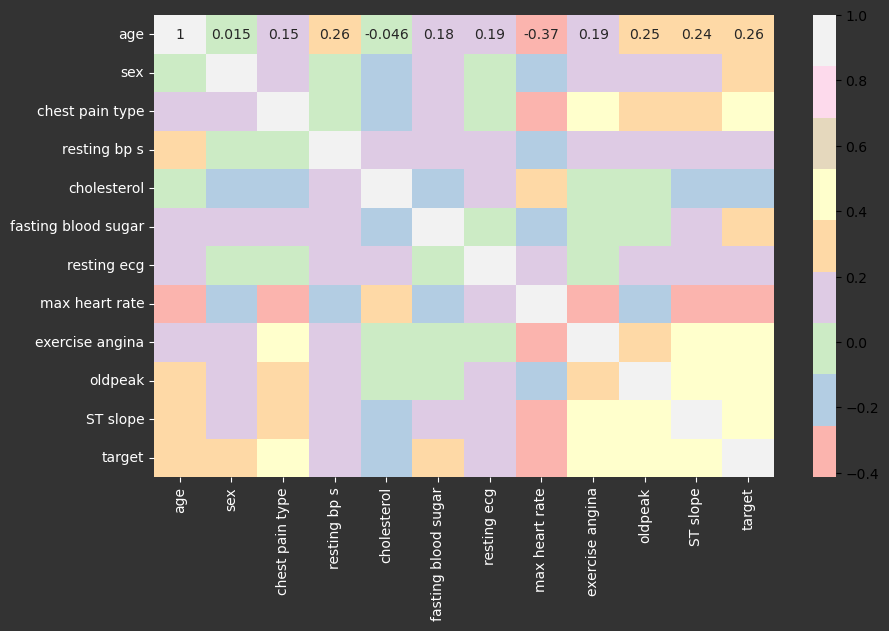

In [6]:
plt.figure(figsize=(10, 6),facecolor='#333333')
sns.heatmap(df.corr(), annot=True, cmap='Pastel1').tick_params(colors='white') 
plt.show()

In [7]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [8]:
df.shape

(1190, 12)

In [9]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

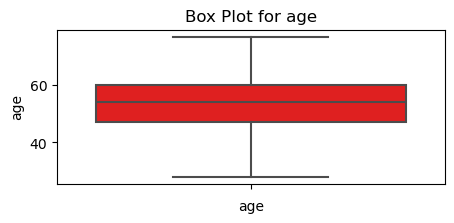

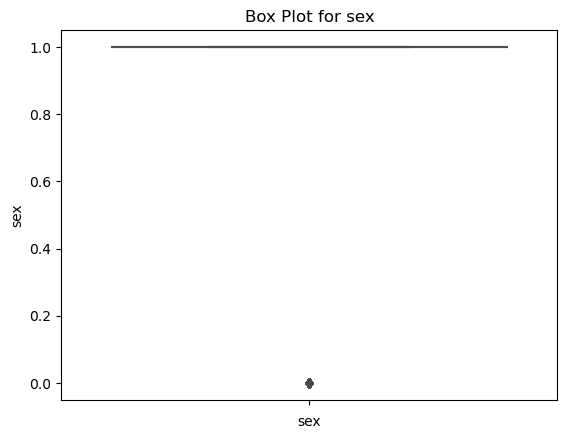

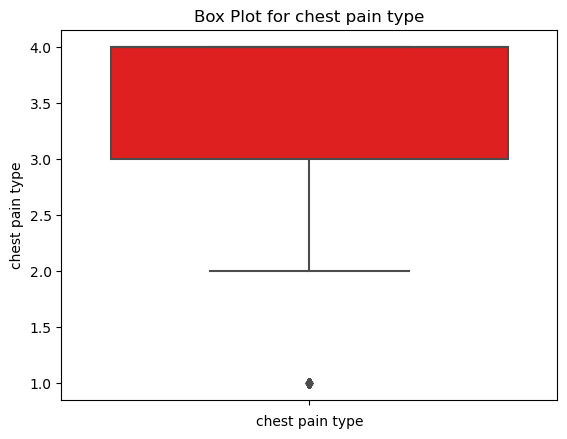

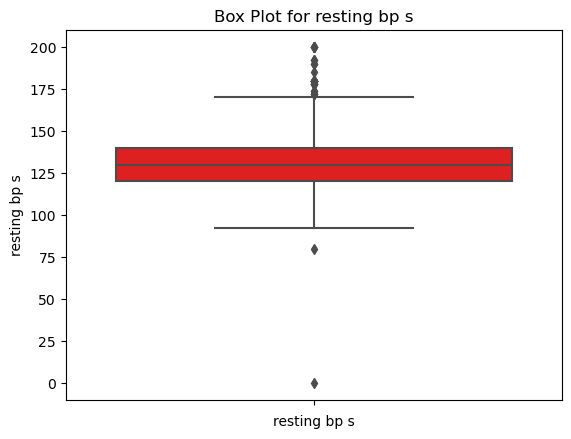

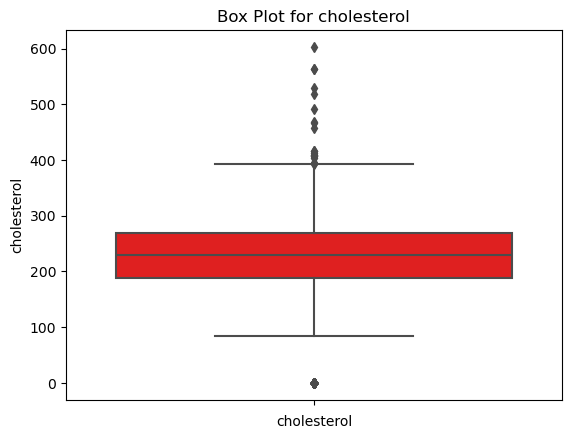

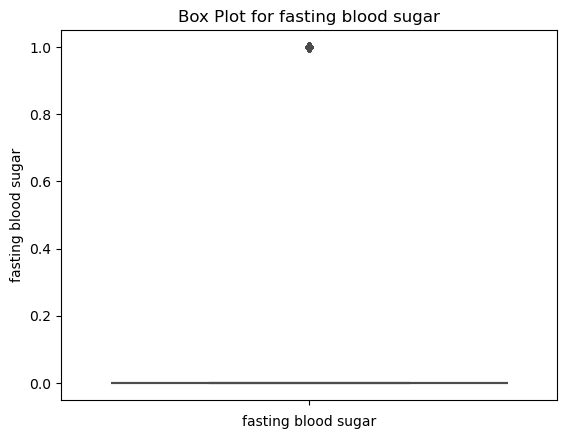

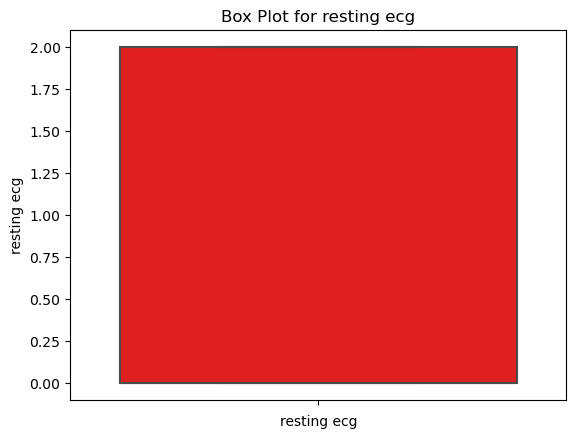

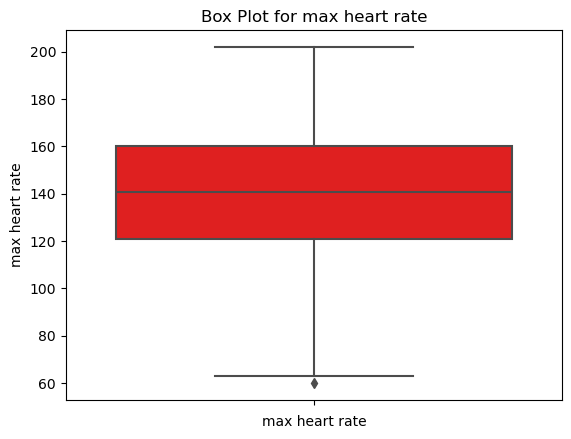

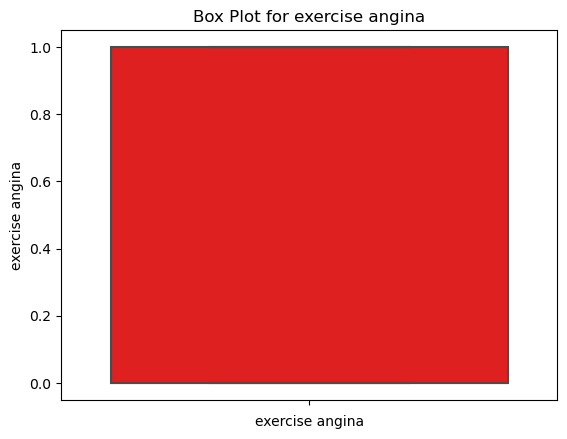

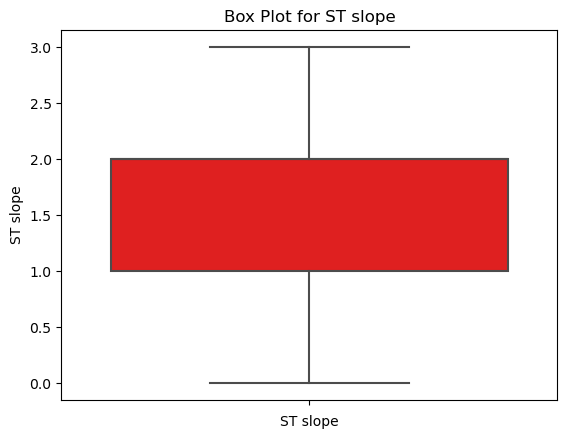

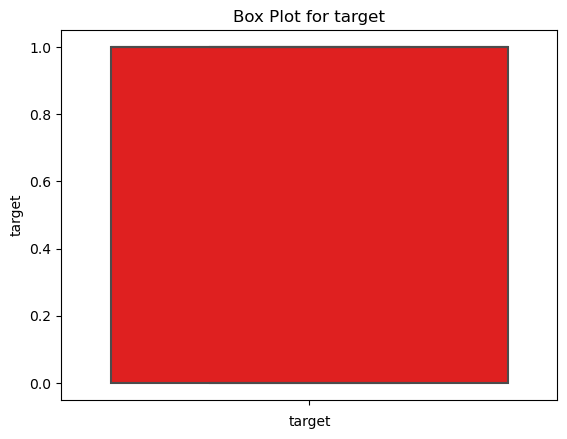

In [10]:
ColList=list(df.select_dtypes('int64').columns)
#Box Plot
plt.figure(figsize=(5, 2))
for column in ColList:
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [11]:
X = df.drop(columns=['target'])
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# *Decision tree parameter estimation*
* Trying out Different splits and Depths to find the best parameter using GridSearchCV Method

### Grid Search Cross-Validation
* This method uses cross vadtiation and Grid Search method to find the best hyper-parameter 

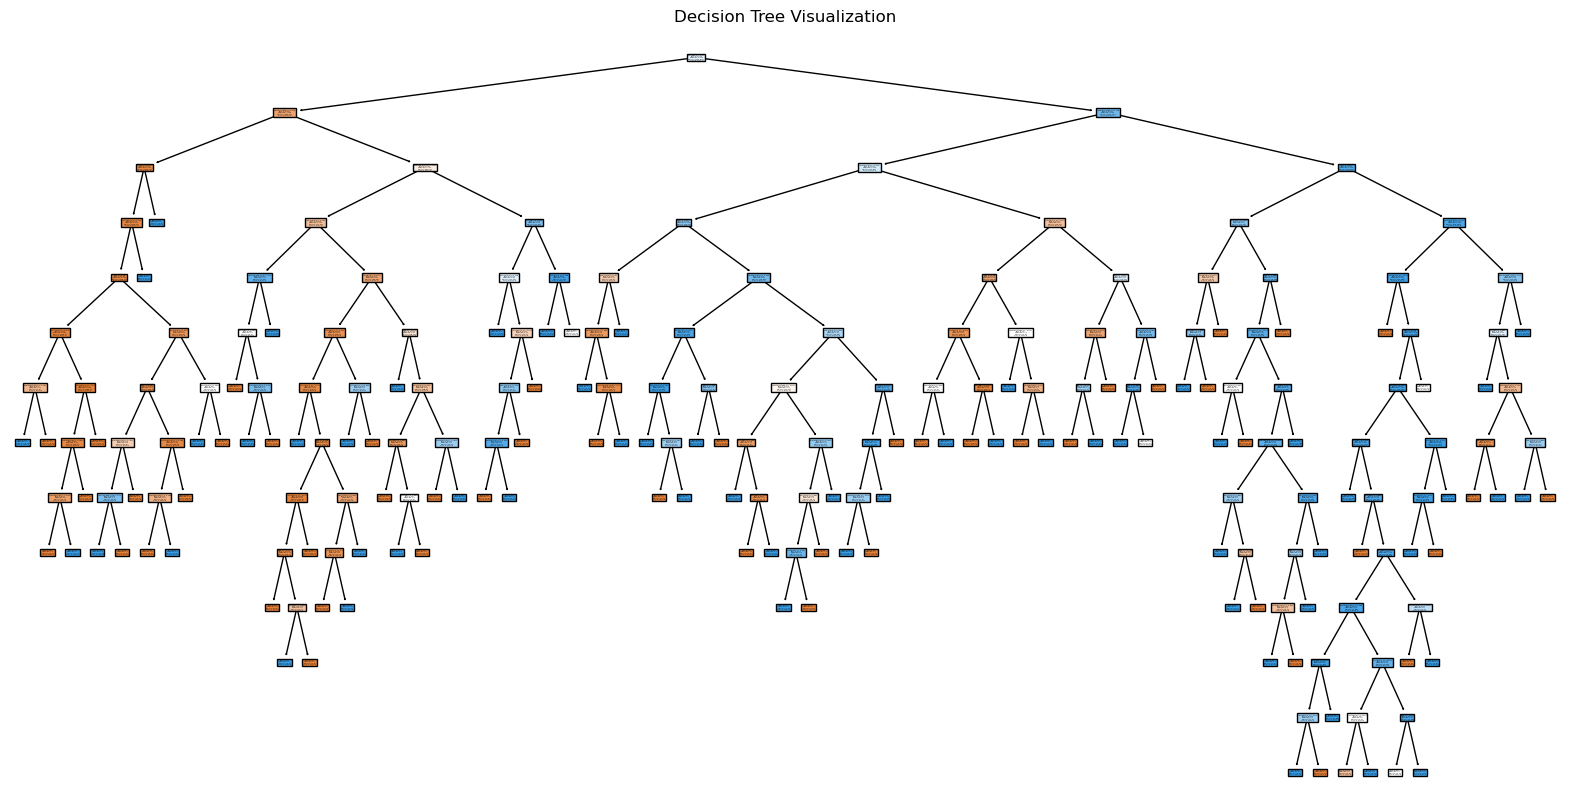

Best Parameters: {'max_depth': 13, 'min_samples_split': 3}
Test Accuracy: 0.8235294117647058


In [14]:

decicisionTree = DecisionTreeClassifier()
paramGrid = {
    'max_depth': [3, 5, 8, 13, None],  # Try different depths
    'min_samples_split': [3, 5, 8, 13,21]  # Try different splits
}

# Use GridSearchCV to find the best hyperparameters
gridSearch = GridSearchCV(estimator=decicisionTree, param_grid=paramGrid, cv=5, scoring='accuracy')
gridSearch.fit(X_train, y_train)


# Get the best parameters
bestParam = gridSearch.best_params_

# Evaluate on the test set
bestModel = gridSearch.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(bestModel, feature_names=df.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
y_pred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", bestParam)
print("Test Accuracy:", accuracy)

### The model is ran through a loop contains different Classification algroithm and the accuracy is compared

In [85]:
models = {
    "LogisticRegression": LogisticRegression(random_state=55),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(max_depth=bestParam['max_depth'],min_samples_split=bestParam['min_samples_split']),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(max_iter=100),
    
}



In [86]:
results = []



In [87]:
for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store results for each model
    results.append({
            "Model": name,
            "Accuracy": np.round(accuracy, 2),
            "Precision (macro avg)": np.round(report["macro avg"]["precision"], 2),
            "Recall (macro avg)": np.round(report["macro avg"]["recall"], 2),
            "F1-score (macro avg)": np.round(report["macro avg"]["f1-score"], 2)
        })

Training LogisticRegression...
LogisticRegression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       118
           1       0.84      0.78      0.81       120

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

Training KNN...
KNN Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.89      0.84      0.86       120

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Training GradientBoosting...
GradientBoosting Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       118
           1       0.90      0.89      0.90       120

    accuracy         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [18]:
#COnvert the result into a datafram
results_df= pd.DataFrame(results)
modelComparisionColumns=results_df.drop(columns=['Model']).columns.to_list()

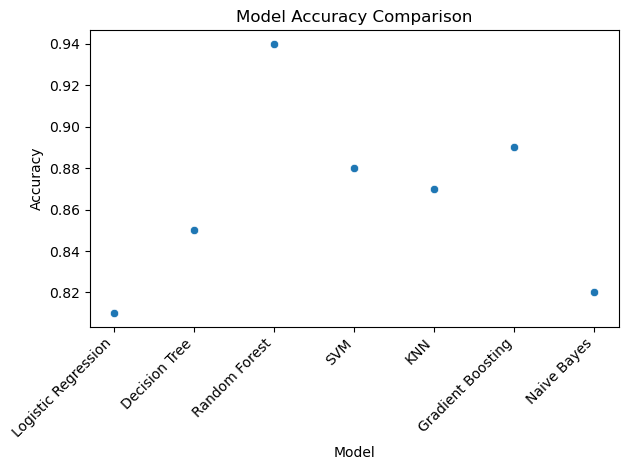

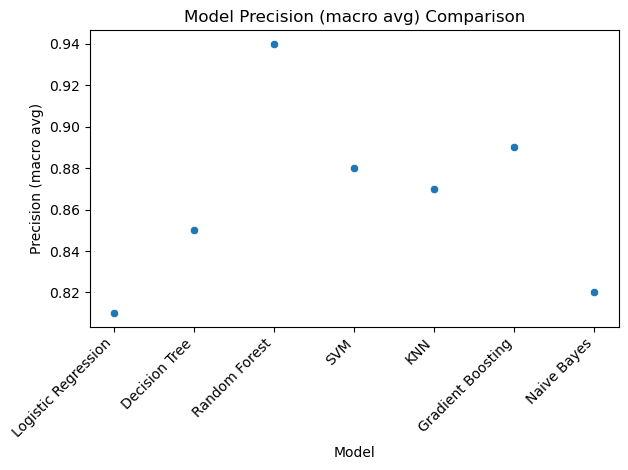

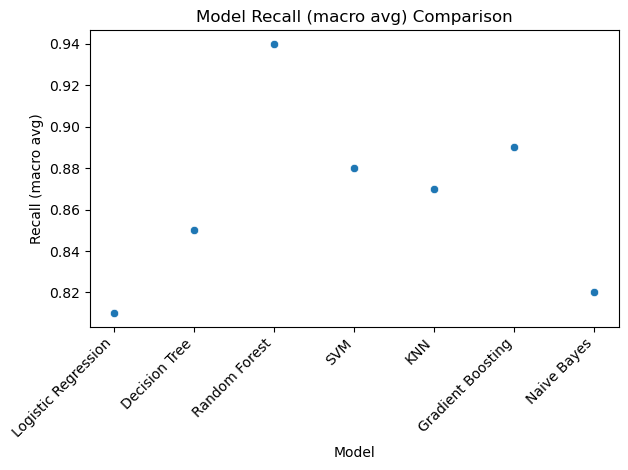

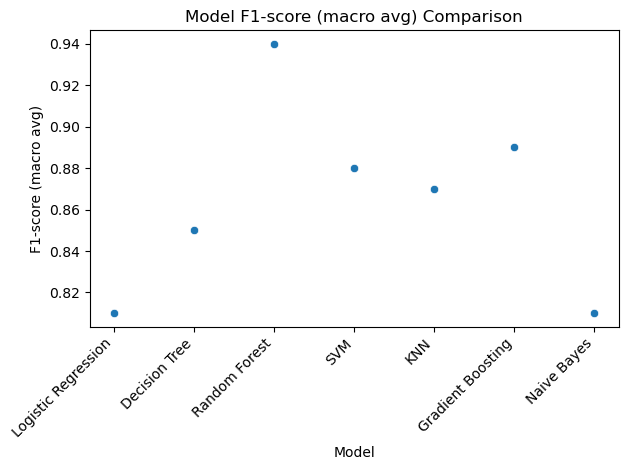

In [19]:
for i in modelComparisionColumns:
    

    sns.scatterplot(y= results_df[i],x = results_df['Model'])
    
    plt.xticks(rotation=45, ha="right") 
    plt.title(f"Model {i} Comparison")
    plt.tight_layout()
    plt.show()

In [88]:
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1-score (macro avg)
0,Logistic Regression,0.81,0.81,0.81,0.81
1,Decision Tree,0.84,0.84,0.84,0.84
2,Random Forest,0.93,0.93,0.93,0.93
3,SVM,0.88,0.88,0.88,0.88
4,KNN,0.87,0.87,0.87,0.87
5,Gradient Boosting,0.89,0.89,0.89,0.89
6,Naive Bayes,0.82,0.82,0.82,0.81


#Processing with K fold K as 5

In [57]:
testResult = []

In [23]:
# Define the number of folds
k = 5  # 5-fold cross-validation

# Initialize KFold with the number of splits
kf = KFold(n_splits=k, shuffle=True, random_state=89)

for modelName,model in models.items():
    pipeline = Pipeline ([
        ('scaler', StandardScaler()),('classifier',model)
    ])

# Perform cross-validation and get scores
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    testResult.append({'modelName':modelName,'score':scores})

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())


Accuracy for each fold: [0.85714286 0.86554622 0.82773109 0.81092437 0.82773109]
Mean accuracy: 0.8378151260504201


In [24]:
scores_df = pd.DataFrame(
    [result['score'] for result in testResult],
    columns=[f"Fold {i+1}" for i in range(5)]
)
scores_df.insert(0, 'Model Name', [result['modelName'] for result in testResult])

# Display the expanded DataFrame
print(scores_df)


            Model Name    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
0  Logistic Regression  0.861345  0.865546  0.815126  0.810924  0.789916
1        Decision Tree  0.886555  0.899160  0.894958  0.865546  0.848739
2        Random Forest  0.957983  0.957983  0.920168  0.936975  0.882353
3                  SVM  0.890756  0.899160  0.878151  0.844538  0.844538
4                  KNN  0.886555  0.869748  0.857143  0.840336  0.794118
5    Gradient Boosting  0.915966  0.911765  0.890756  0.857143  0.857143
6          Naive Bayes  0.857143  0.865546  0.827731  0.810924  0.827731


# KMeans clustering 
* To find the optimal K, has used Elbow Method. 
* The Elbow method uses within-cluster-sum-of-square (WCSS) vs K value graph. The optimal K value is at the point where the graph forms an elbow

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

In [30]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=55)
    km.fit(X_test)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


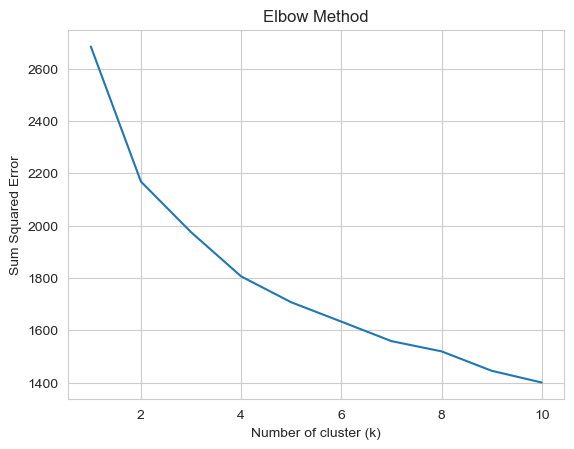

In [31]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')

plt.show()

* From the graph we could incur that the graph form an elbow at 5, therefor 5 is the optimal K value

In [32]:
k = 5
kmeans = KMeans(n_clusters=k,max_iter=5000)

In [33]:
kmeans.fit(X_train)
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [35]:
ari_score = adjusted_rand_score(y_test, test_clusters)
nmi_score = normalized_mutual_info_score(y_test, test_clusters)
silhouette_avg = silhouette_score(X_test, test_clusters)

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)
print("Silhouette Score:", silhouette_avg)

Adjusted Rand Index (ARI): 0.15666588738280768
Normalized Mutual Information (NMI): 0.20576265535381724
Silhouette Score: 0.15731597706281616


In [36]:
pd.Series(kmeans.labels_).value_counts()

2    275
3    264
1    176
0    128
4    109
Name: count, dtype: int64